In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.25, random_state=0)

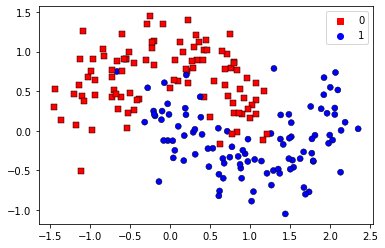

In [3]:
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.savefig('figures/moons_data.pdf')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [6]:
print('Accuracy on training set:', adaboost.score(X_train, y_train))
print('Accuracy on test set:', adaboost.score(X_test, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.95


In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, class_names, 
                             colors=['r', 'b'], markers=('s', 'o')):  
    cmap = ListedColormap(colors)
      
    # Create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # Find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # Put the result into a color plot  
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # Plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()

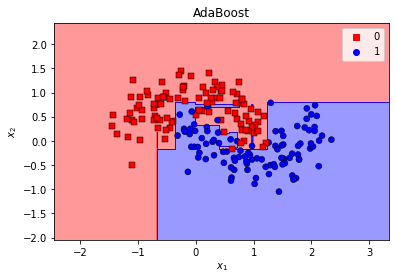

In [9]:
plot_decision_boundaries(adaboost, X, y, feature_names=['$x_1$', '$x_2$'], class_names=np.array(['0', '1']))
plt.title('AdaBoost')

plt.savefig('figures/AdaboostMoons.pdf')

In [3]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(0)

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [8]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 0.7143
Test accuracy: 0.7368


In [9]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': np.linspace(0.1, 1.0, 10),
}

grid = RandomizedSearchCV(AdaBoostClassifier(random_state=42), param_grid, n_iter=50, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'n_estimators': 200, 'learning_rate': 0.1}


In [10]:
print(f'Train accuracy: {grid.score(X_train, y_train):.4f}')
print(f'Test accuracy: {grid.score(X_test, y_test):.4f}')

Train accuracy: 0.6786
Test accuracy: 0.7368


In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, class_names, 
                             colors=['r', 'c', 'b'], markers=('s', 'o', '^')):  
    cmap = ListedColormap(colors)
      
    # Create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # Find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # Put the result into a color plot  
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # Plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()

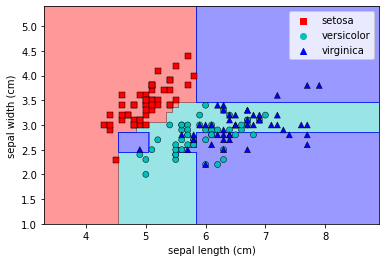

In [12]:
plot_decision_boundaries(clf, X, y, iris.feature_names, iris.target_names)
plt.savefig('figures/iris_tree_boundaries.pdf')